In [ ]:
# Import library
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split

In [ ]:
# Load dataset train, test, dan evaluation
train_data = pd.read_csv("/content/train (2).csv", header=0, sep=';')
test_data = pd.read_csv("/content/test (1).csv", header=0, sep=';')
eval_data = pd.read_csv("/content/evaluation.csv", header=0, sep=";")

In [ ]:
eval_data

,Unnamed: 0,title,text,label
0,0,"Sanders back in U.S. Senate, blasts 'coloniali...",WASHINGTON (Reuters) - Democratic U.S. preside...,1
1,1,Kremlin: Syria peoples' congress being 'active...,MOSCOW (Reuters) - A proposal to convene a con...,1
2,2,Oregon Cop Convicted Of Shattering Biker’s Co...,"In a baffling fit of rage, an Oregon State Pol...",0
3,3,Twitter Erupts With Glee Over #CruzSexScandal...,The last thing any politician running for the ...,0
4,4,MUST WATCH VIDEO: Obama Tries To Trash Trump B...,This is too good to miss! Mr. Teleprompter did...,0
...,...,...,...,...
8112,8112,Sean Hannity Throws Hissy Fit After Real Repo...,"Just like Donald Trump, Sean Hannity has a thi...",0
8113,8113,FORMER ASST FBI DIRECTOR WARNS ANTI-TRUMP KABA...,Former Asst. FBI Director James Kallstrom spok...,0
8114,8114,John McCain: Trump’s Attacks On The Press Are...,Donald Trump has declared the media to be the...,0
8115,8115,Syria's Deir al-Zor air base working again: st...,BEIRUT (Reuters) - The Deir al-Zor military ai...,1


In [ ]:
train_data

,Unnamed: 0,title,text,label
0,0,Palestinians switch off Christmas lights in Be...,"RAMALLAH, West Bank (Reuters) - Palestinians s...",1
1,1,China says Trump call with Taiwan president wo...,BEIJING (Reuters) - U.S. President-elect Donal...,1
2,2,FAIL! The Trump Organization’s Credit Score W...,While the controversy over Trump s personal ta...,0
3,3,Zimbabwe military chief's China trip was norma...,BEIJING (Reuters) - A trip to Beijing last wee...,1
4,4,THE MOST UNCOURAGEOUS PRESIDENT EVER Receives ...,There has never been a more UNCOURAGEOUS perso...,0
...,...,...,...,...
24348,24348,Mexico Senate committee OK's air transport dea...,MEXICO CITY (Reuters) - A key committee in Mex...,1
24349,24349,BREAKING: HILLARY CLINTON’S STATE DEPARTMENT G...,IF SHE S NOT TOAST NOW THEN WE RE IN BIGGER TR...,0
24350,24350,trump breaks from stump speech to admire beaut...,kremlin nato was created for agression \nruss...,0
24351,24351,NFL PLAYER Delivers Courageous Message: Stop B...,Dallas Cowboys star wide receiver Dez Bryant t...,0


In [ ]:
test_data

,Unnamed: 0,title,text,label
0,0,"Live from New York, it's a Trump-Clinton remat...",NEW YORK (Reuters) - Veteran actor and frequen...,1
1,1,Catalan separatists to lose majority in tight ...,BARCELONA (Reuters) - Catalonia s independence...,1
2,2,North Carolina governor concedes election to D...,"WINSTON-SALEM, N.C. (Reuters) - North Carolina...",1
3,3,Draft Senate Iran legislation sets tough new U...,WASHINGTON (Reuters) - Draft legislation respo...,1
4,4,California governor taps U.S. Representative B...,"SACRAMENTO, Calif. (Reuters) - California Gove...",1
...,...,...,...,...
8112,8112,Sanders at Vatican says rich-poor gap worse th...,VATICAN CITY (Reuters) - U.S. presidential can...,1
8113,8113,how trump happened,force and fanaticism wahhabism in saudi arabi...,1
8114,8114,Turkey will take two steps if Germany takes on...,"ISTANBUL (Reuters) - Turkey, whose relations w...",1
8115,8115,BREAKING: DEVICE THAT BUSTED HILLARY CLINTON D...,Here s why Clinton and Abedin should be flippi...,0


In [ ]:
# Menghilangkan baris yang terdapat Null dalam dataset
train_data.dropna(subset=['title', 'text', 'label'], inplace=True)
test_data.dropna(subset=['title', 'text', 'label'], inplace=True)
eval_data.dropna(subset=['title', 'text', 'label'], inplace=True)

In [ ]:
# Menggabungkan kolom 'title' dan 'text' menjadi satu fitur
train_data['combined_text'] = train_data['title'] + " " + train_data['text']
test_data['combined_text'] = test_data['title'] + " " + test_data['text']
eval_data['combined_text'] = eval_data['title'] + " " + eval_data['text']

In [ ]:
# Vectorization: Representasi teks ke dalam bentuk numerik
vectorizer = CountVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(train_data['combined_text'])
y_train = train_data['label']

X_test = vectorizer.transform(test_data['combined_text'])
y_test = test_data['label']

X_eval = vectorizer.transform(eval_data['combined_text'])
y_eval = eval_data['label']


In [ ]:
# Training: Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Testing: Prediksi data uji
y_test_pred = model.predict(X_test)
print("=== Testing Data Performance ===")
print("Accuracy (Test):", accuracy_score(y_test, y_test_pred))
print("\nClassification Report (Test):\n", classification_report(y_test, y_test_pred))

=== Testing Data Performance ===
Accuracy (Test): 0.982629050141678

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      3753
           1       0.98      0.98      0.98      4364

    accuracy                           0.98      8117
   macro avg       0.98      0.98      0.98      8117
weighted avg       0.98      0.98      0.98      8117



In [ ]:
# Evaluation: Prediksi data evaluasi
y_eval_pred = model.predict(X_eval)
print("=== Evaluation Data Performance ===")
print("Accuracy (Evaluation):", accuracy_score(y_eval, y_eval_pred))
print("\nClassification Report (Evaluation):\n", classification_report(y_eval, y_eval_pred))

=== Evaluation Data Performance ===
Accuracy (Evaluation): 0.9793026980411482

Classification Report (Evaluation):
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      3803
           1       0.98      0.98      0.98      4314

    accuracy                           0.98      8117
   macro avg       0.98      0.98      0.98      8117
weighted avg       0.98      0.98      0.98      8117



In [ ]:
y_eval_prob = model.predict_proba(X_eval)  # Probabilitas prediksi
cross_entropy_loss = log_loss(y_eval, y_eval_prob)  # Menggunakan probabilitas, bukan label
print("Cross-Entropy Loss:", cross_entropy_loss)

Cross-Entropy Loss: 0.0904111392360747


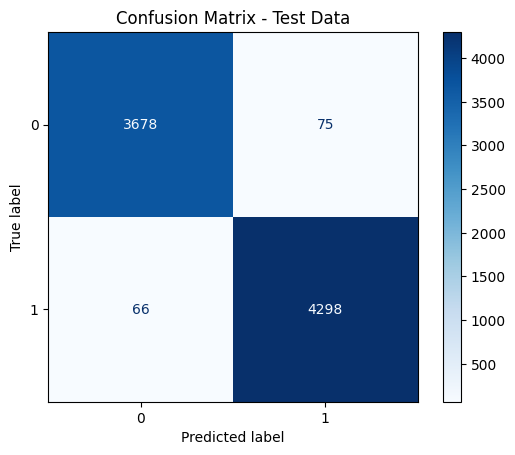

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Plot Confusion Matrix untuk data test
conf_matrix = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Test Data")
plt.show()

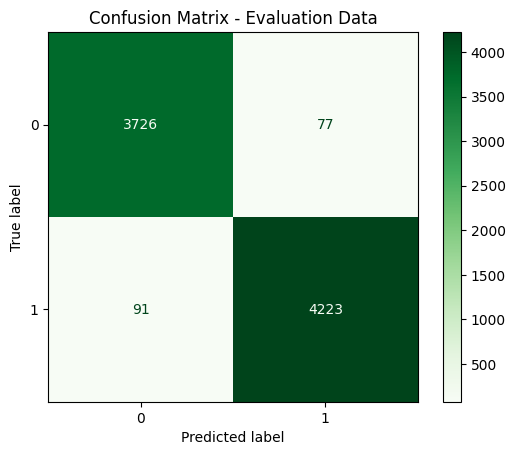

In [ ]:
# Plot Confusion Matrix untuk data evaluasi
conf_matrix_eval = confusion_matrix(y_eval, y_eval_pred)
disp_eval = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_eval)
disp_eval.plot(cmap=plt.cm.Greens)
plt.title("Confusion Matrix - Evaluation Data")
plt.show()

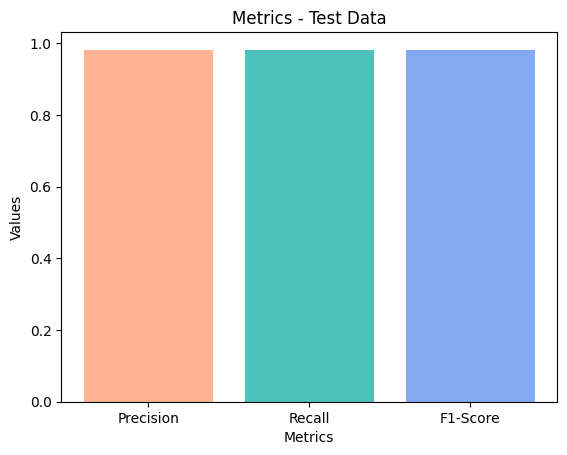

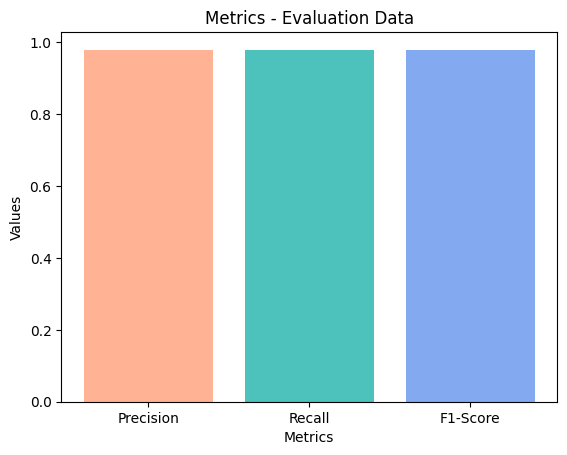

In [ ]:
# Menampilkan metrik evaluasi sebagai grafik bar
def plot_metrics(metrics, labels, title):
    x = np.arange(len(labels))
    plt.bar(x, metrics, color=['#FFA07A', '#20B2AA', '#6495ED'], alpha=0.8)
    plt.xticks(x, labels)
    plt.xlabel("Metrics")
    plt.ylabel("Values")
    plt.title(title)
    plt.show()

# Mengambil metrik dari classification report
report_test = classification_report(y_test, y_test_pred, output_dict=True)
report_eval = classification_report(y_eval, y_eval_pred, output_dict=True)

# Plot Grafik Metrik untuk Data Test
metrics_test = [
    report_test['weighted avg']['precision'],
    report_test['weighted avg']['recall'],
    report_test['weighted avg']['f1-score'],
]
plot_metrics(metrics_test, ["Precision", "Recall", "F1-Score"], "Metrics - Test Data")

# Plot Grafik Metrik untuk Data Evaluasi
metrics_eval = [
    report_eval['weighted avg']['precision'],
    report_eval['weighted avg']['recall'],
    report_eval['weighted avg']['f1-score'],
]
plot_metrics(metrics_eval, ["Precision", "Recall", "F1-Score"], "Metrics - Evaluation Data")